<a href="https://colab.research.google.com/github/harshavardhangadila/Training-Neural-networks-with-Keras/blob/main/Part%201/K_4_Timeseries_Augmentation_and_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install required libraries
!pip install -q tsaug tensorflow


In [5]:
!pip install -q scikit-learn

In [6]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras import layers, models

In [7]:
# Load wine quality dataset
wine = fetch_openml(name="wine-quality-red", version=1, as_frame=True)

# Extract features and labels
X = wine.data.to_numpy()
y = wine.target.to_numpy()

print(f"Shape of X: {X.shape}")
print(f"Shape of y: {y.shape}")


Shape of X: (1599, 11)
Shape of y: (1599,)


In [8]:
# Normalize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Encode labels as integers
encoder = LabelEncoder()
y = encoder.fit_transform(y)

# Expand dimensions for LSTM input
X = X[..., np.newaxis]

print(f"Shape of X after reshaping: {X.shape}")


Shape of X after reshaping: (1599, 11, 1)


In [9]:
# Function to add small noise (jitter)
def jitter(X, sigma=0.02):
    noise = np.random.normal(loc=0.0, scale=sigma, size=X.shape)
    return X + noise

# Create augmented dataset
X_aug = jitter(X)


In [10]:
# Split original data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Split augmented data
X_train_aug, X_test_aug, y_train_aug, y_test_aug = train_test_split(
    X_aug, y, test_size=0.3, random_state=42
)


In [11]:
# Define simple LSTM model
def build_lstm_model():
    model = models.Sequential([
        layers.LSTM(32, input_shape=(X_train.shape[1], 1)),
        layers.Dense(len(np.unique(y)), activation='softmax')
    ])
    model.compile(
        optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    return model


In [12]:
# Build and train model on original data
model_normal = build_lstm_model()

history_normal = model_normal.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=30,
    batch_size=32,
    verbose=2
)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/30
35/35 - 7s - 205ms/step - accuracy: 0.4897 - loss: 1.6733 - val_accuracy: 0.4458 - val_loss: 1.5082
Epoch 2/30
35/35 - 1s - 16ms/step - accuracy: 0.4861 - loss: 1.2383 - val_accuracy: 0.5437 - val_loss: 1.1241
Epoch 3/30
35/35 - 1s - 20ms/step - accuracy: 0.5836 - loss: 1.0987 - val_accuracy: 0.5417 - val_loss: 1.0944
Epoch 4/30
35/35 - 1s - 16ms/step - accuracy: 0.5764 - loss: 1.0615 - val_accuracy: 0.5208 - val_loss: 1.0836
Epoch 5/30
35/35 - 1s - 17ms/step - accuracy: 0.5746 - loss: 1.0397 - val_accuracy: 0.5292 - val_loss: 1.0645
Epoch 6/30
35/35 - 1s - 17ms/step - accuracy: 0.5809 - loss: 1.0222 - val_accuracy: 0.5375 - val_loss: 1.0518
Epoch 7/30
35/35 - 0s - 11ms/step - accuracy: 0.5702 - loss: 1.0135 - val_accuracy: 0.5354 - val_loss: 1.0526
Epoch 8/30
35/35 - 0s - 9ms/step - accuracy: 0.5853 - loss: 1.0048 - val_accuracy: 0.5500 - val_loss: 1.0395
Epoch 9/30
35/35 - 1s - 18ms/step - accuracy: 0.5916 - loss: 0.9970 - val_accuracy: 0.5479 - val_loss: 1.0326
Epoch 10/3

In [13]:
# Build and train model on original data
model_normal = build_lstm_model()

history_normal = model_normal.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=30,
    batch_size=32,
    verbose=2
)


Epoch 1/30
35/35 - 3s - 73ms/step - accuracy: 0.4388 - loss: 1.7089 - val_accuracy: 0.4917 - val_loss: 1.5463
Epoch 2/30
35/35 - 0s - 9ms/step - accuracy: 0.4996 - loss: 1.2735 - val_accuracy: 0.4500 - val_loss: 1.1809
Epoch 3/30
35/35 - 0s - 9ms/step - accuracy: 0.5567 - loss: 1.1418 - val_accuracy: 0.5188 - val_loss: 1.1398
Epoch 4/30
35/35 - 1s - 21ms/step - accuracy: 0.5487 - loss: 1.1154 - val_accuracy: 0.5021 - val_loss: 1.1331
Epoch 5/30
35/35 - 0s - 14ms/step - accuracy: 0.5594 - loss: 1.0954 - val_accuracy: 0.5125 - val_loss: 1.1134
Epoch 6/30
35/35 - 1s - 20ms/step - accuracy: 0.5648 - loss: 1.0726 - val_accuracy: 0.5188 - val_loss: 1.0908
Epoch 7/30
35/35 - 1s - 28ms/step - accuracy: 0.5764 - loss: 1.0522 - val_accuracy: 0.5354 - val_loss: 1.0742
Epoch 8/30
35/35 - 1s - 15ms/step - accuracy: 0.5746 - loss: 1.0362 - val_accuracy: 0.5292 - val_loss: 1.0726
Epoch 9/30
35/35 - 1s - 18ms/step - accuracy: 0.5737 - loss: 1.0257 - val_accuracy: 0.5375 - val_loss: 1.0606
Epoch 10/30


In [14]:
# Build and train model on augmented data
model_aug = build_lstm_model()

history_aug = model_aug.fit(
    X_train_aug, y_train_aug,
    validation_data=(X_test_aug, y_test_aug),
    epochs=30,
    batch_size=32,
    verbose=2
)


Epoch 1/30
35/35 - 3s - 73ms/step - accuracy: 0.3342 - loss: 1.7279 - val_accuracy: 0.4917 - val_loss: 1.5898
Epoch 2/30
35/35 - 0s - 9ms/step - accuracy: 0.5040 - loss: 1.3105 - val_accuracy: 0.5250 - val_loss: 1.1693
Epoch 3/30
35/35 - 1s - 18ms/step - accuracy: 0.5496 - loss: 1.1457 - val_accuracy: 0.5250 - val_loss: 1.1363
Epoch 4/30
35/35 - 1s - 17ms/step - accuracy: 0.5621 - loss: 1.1203 - val_accuracy: 0.5146 - val_loss: 1.1252
Epoch 5/30
35/35 - 1s - 18ms/step - accuracy: 0.5684 - loss: 1.0973 - val_accuracy: 0.5354 - val_loss: 1.0999
Epoch 6/30
35/35 - 0s - 8ms/step - accuracy: 0.5728 - loss: 1.0723 - val_accuracy: 0.5250 - val_loss: 1.0882
Epoch 7/30
35/35 - 0s - 9ms/step - accuracy: 0.5719 - loss: 1.0532 - val_accuracy: 0.5437 - val_loss: 1.0725
Epoch 8/30
35/35 - 1s - 18ms/step - accuracy: 0.5764 - loss: 1.0386 - val_accuracy: 0.5437 - val_loss: 1.0640
Epoch 9/30
35/35 - 0s - 8ms/step - accuracy: 0.5746 - loss: 1.0256 - val_accuracy: 0.5458 - val_loss: 1.0564
Epoch 10/30
35

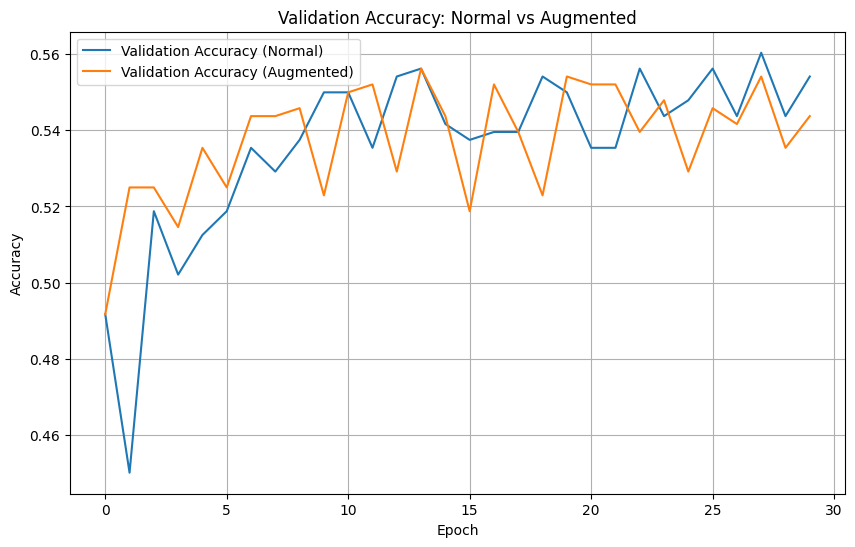

In [15]:
# Plot validation accuracy
plt.figure(figsize=(10, 6))
plt.plot(history_normal.history['val_accuracy'], label='Validation Accuracy (Normal)')
plt.plot(history_aug.history['val_accuracy'], label='Validation Accuracy (Augmented)')
plt.title('Validation Accuracy: Normal vs Augmented')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()


In [16]:
# Evaluate normal model
loss_normal, acc_normal = model_normal.evaluate(X_test, y_test, verbose=0)

# Evaluate augmented model
loss_aug, acc_aug = model_aug.evaluate(X_test_aug, y_test_aug, verbose=0)

print(f"Test Accuracy (Normal Data): {acc_normal:.4f}")
print(f"Test Accuracy (Augmented Data): {acc_aug:.4f}")


Test Accuracy (Normal Data): 0.5542
Test Accuracy (Augmented Data): 0.5437


In [17]:
# Predict test labels for both models
y_pred_normal = model_normal.predict(X_test)
y_pred_aug = model_aug.predict(X_test_aug)

# Convert probabilities to class labels
y_pred_normal = np.argmax(y_pred_normal, axis=1)
y_pred_aug = np.argmax(y_pred_aug, axis=1)


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step  
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


In [18]:
# Import evaluation metrics
from sklearn.metrics import confusion_matrix, classification_report

# Confusion matrix for normal model
print("Confusion Matrix (Normal Model):")
print(confusion_matrix(y_test, y_pred_normal))

# Classification report for normal model
print("\nClassification Report (Normal Model):")
print(classification_report(y_test, y_pred_normal))

# Confusion matrix for augmented model
print("Confusion Matrix (Augmented Model):")
print(confusion_matrix(y_test_aug, y_pred_aug))

# Classification report for augmented model
print("\nClassification Report (Augmented Model):")
print(classification_report(y_test_aug, y_pred_aug))


Confusion Matrix (Normal Model):
[[  0   0   1   0   0   0]
 [  0   0   8   9   0   0]
 [  0   0 145  49   1   0]
 [  0   0  78 115   7   0]
 [  0   0   8  47   6   0]
 [  0   0   0   2   4   0]]

Classification Report (Normal Model):
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00        17
           2       0.60      0.74      0.67       195
           3       0.52      0.57      0.55       200
           4       0.33      0.10      0.15        61
           5       0.00      0.00      0.00         6

    accuracy                           0.55       480
   macro avg       0.24      0.24      0.23       480
weighted avg       0.50      0.55      0.52       480

Confusion Matrix (Augmented Model):
[[  0   0   1   0   0   0]
 [  0   0   9   8   0   0]
 [  0   0 151  42   2   0]
 [  0   0  89  97  14   0]
 [  0   0   9  39  13   0]
 [  0   0   0   2   4   0]]

Classification Report 

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

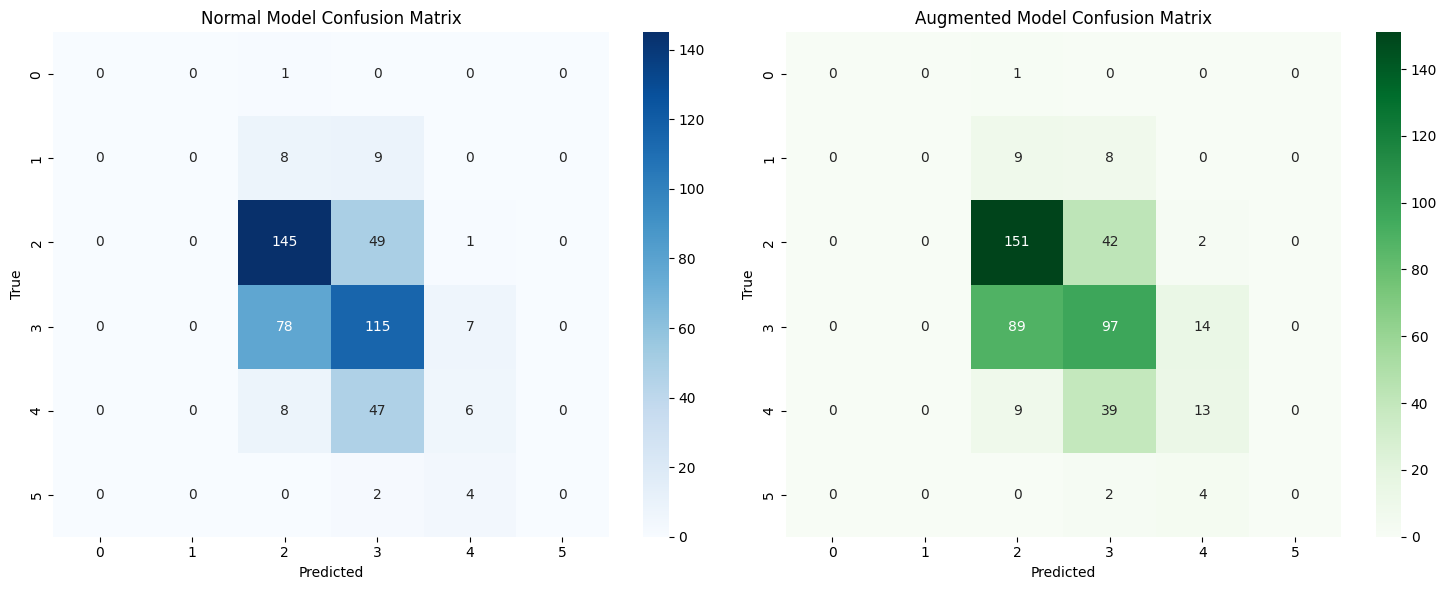

In [19]:
# Plot confusion matrices side by side
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot for normal model
sns.heatmap(confusion_matrix(y_test, y_pred_normal), annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title("Normal Model Confusion Matrix")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("True")

# Plot for augmented model
sns.heatmap(confusion_matrix(y_test_aug, y_pred_aug), annot=True, fmt='d', cmap='Greens', ax=axes[1])
axes[1].set_title("Augmented Model Confusion Matrix")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("True")

plt.tight_layout()
plt.show()
